In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# Read training data generated from Tabular_Data.ipynb
df = pd.read_csv('training_data.csv')
display(df)

,total_pixel_count,color_pixel_count,white_pixel_count,color_ratio,r,g,b,width,color_width,class_id
0,213444,6189,207255,0.028996,57,57,85,462.0,78.670198,a
1,244036,12996,231040,0.053254,27,27,58,494.0,114.000000,a
2,373321,3322,369999,0.008899,52,51,82,611.0,57.636794,a
3,301401,20164,281237,0.066901,86,86,70,549.0,142.000000,a
4,198916,12996,185920,0.065334,50,50,50,446.0,114.000000,a
...,...,...,...,...,...,...,...,...,...,...
1495,366025,6365,359660,0.017390,176,177,182,605.0,79.780950,c
1496,125316,2500,122816,0.019950,153,153,204,354.0,50.000000,c
1497,155236,6084,149152,0.039192,230,230,185,394.0,78.000000,c
1498,321489,20736,300753,0.064500,181,181,196,567.0,144.000000,c


In [3]:
# Creating dataframes of the training data of each class
a = df[df['class_id'] == 'a']
b = df[df['class_id'] == 'b']
c = df[df['class_id'] == 'c']

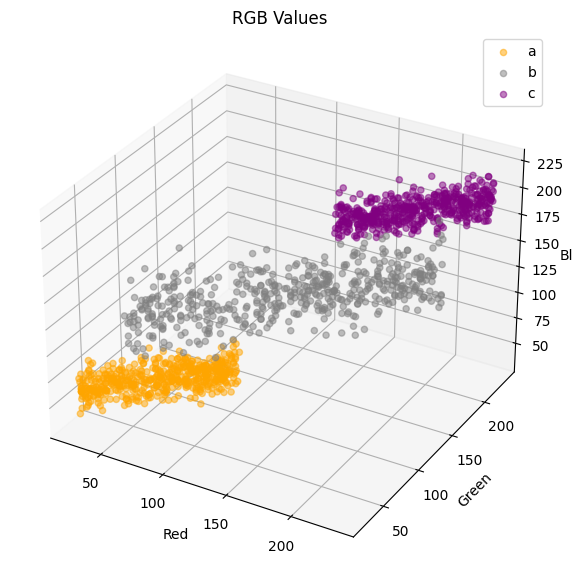

In [4]:
# Visualize the RGB values
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(a['r'], a['g'], a['b'], color='orange', alpha=0.5)
ax.scatter3D(b['r'], b['g'], b['b'], color='gray', alpha=0.5)
ax.scatter3D(c['r'], c['g'], c['b'], color='purple', alpha=0.5)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('RGB Values')
plt.legend(("a","b","c"))
plt.show()

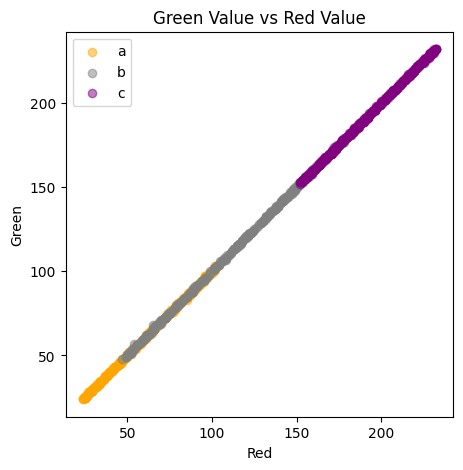

In [5]:
# Comparison of green vs red values
fig = plt.figure(figsize = (5, 5))
plt.scatter(a['r'], a['g'], color='orange', alpha=0.5)
plt.scatter(b['r'], b['g'], color='gray', alpha=0.5)
plt.scatter(c['r'], c['g'], color='purple', alpha=0.5)
plt.title("Green Value vs Red Value")
plt.ylabel("Green")
plt.xlabel("Red")
plt.legend(("a","b","c"))

Text(0.5, 0, 'Green')

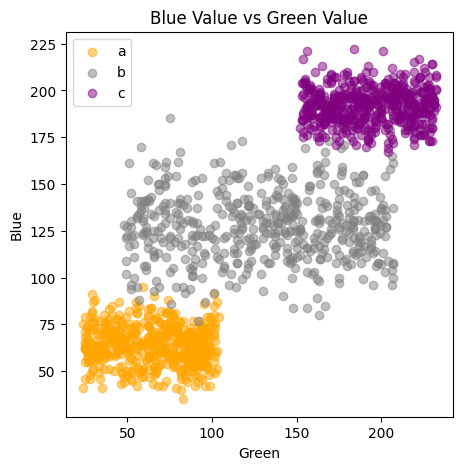

In [6]:
# Comparison of blue vs green values
fig = plt.figure(figsize = (5, 5))
plt.scatter(a['g'], a['b'], color='orange', alpha=0.5)
plt.scatter(b['g'], b['b'], color='gray', alpha=0.5)
plt.scatter(c['g'], c['b'], color='purple', alpha=0.5)
plt.legend(("a","b","c"))
plt.title("Blue Value vs Green Value")
plt.ylabel("Blue")
plt.xlabel("Green")

Text(0.5, 0, 'Red')

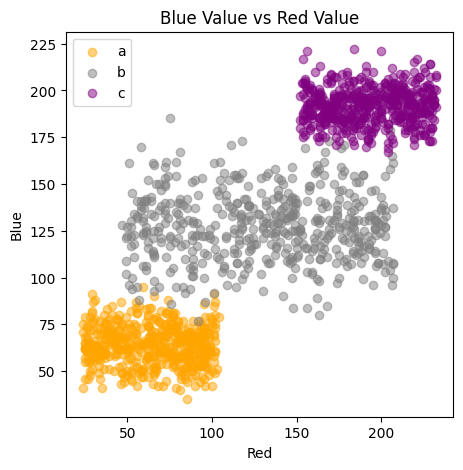

In [7]:
# Comparison of blue vs red values
fig = plt.figure(figsize = (5, 5))
plt.scatter(a['r'], a['b'], color='orange', alpha=0.5)
plt.scatter(b['r'], b['b'], color='gray', alpha=0.5)
plt.scatter(c['r'], c['b'], color='purple', alpha=0.5)
plt.legend(("a","b","c"))
plt.title("Blue Value vs Red Value")
plt.ylabel("Blue")
plt.xlabel("Red")

In [8]:
# Describe data for class a
print(stats.describe(a['r']))
print(stats.describe(a['g']))
print(stats.describe(a['b']))

DescribeResult(nobs=500, minmax=(24, 104), mean=64.8, variance=540.8016032064128, skewness=-0.13464737214348188, kurtosis=-1.2246270095917113)
DescribeResult(nobs=500, minmax=(24, 104), mean=64.834, variance=539.5295030060121, skewness=-0.13420930456235033, kurtosis=-1.2248133526479035)
DescribeResult(nobs=500, minmax=(35, 95), mean=64.02, variance=111.14589178356711, skewness=0.03737946627928692, kurtosis=-0.2871064599608131)


In [9]:
# Describe data for class b
print(stats.describe(b['r']))
print(stats.describe(b['g']))
print(stats.describe(b['b']))

DescribeResult(nobs=500, minmax=(47, 207), mean=130.74, variance=2101.9763527054106, skewness=-0.1253206247487692, kurtosis=-1.173193163867362)
DescribeResult(nobs=500, minmax=(48, 207), mean=130.798, variance=2099.031258517034, skewness=-0.12512640084336518, kurtosis=-1.1741266817637814)
DescribeResult(nobs=500, minmax=(77, 185), mean=127.362, variance=336.211378757515, skewness=0.11303941972228934, kurtosis=-0.08321418639269318)


In [10]:
# Describe data for class c
print(stats.describe(c['r']))
print(stats.describe(c['g']))
print(stats.describe(c['b']))

DescribeResult(nobs=500, minmax=(152, 232), mean=192.466, variance=545.5519478957916, skewness=0.019582423449342027, kurtosis=-1.233067143115398)
DescribeResult(nobs=500, minmax=(152, 232), mean=192.538, variance=543.7240040080159, skewness=0.022169005770508232, kurtosis=-1.232083608872845)
DescribeResult(nobs=500, minmax=(167, 222), mean=191.754, variance=95.60870140280561, skewness=0.11848537722572301, kurtosis=-0.12022456453799402)


Text(0.5, 1.0, 'Blue Values')

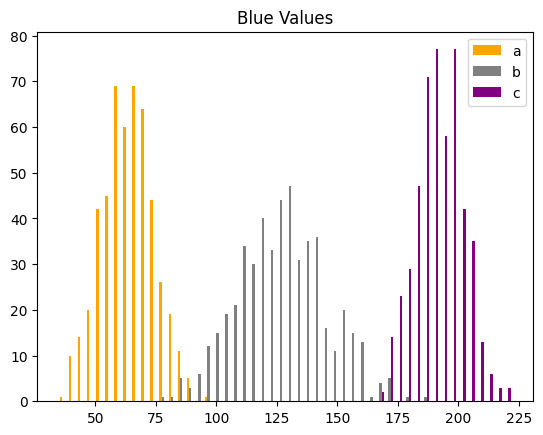

In [11]:
# Visualize and compare blue values of each class
plt.hist([a['b'],b['b'],c['b']], bins=50, color=['orange','gray','purple'])
plt.legend(("a","b","c"))
plt.title("Blue Values")

Text(0.5, 1.0, 'Red Values')

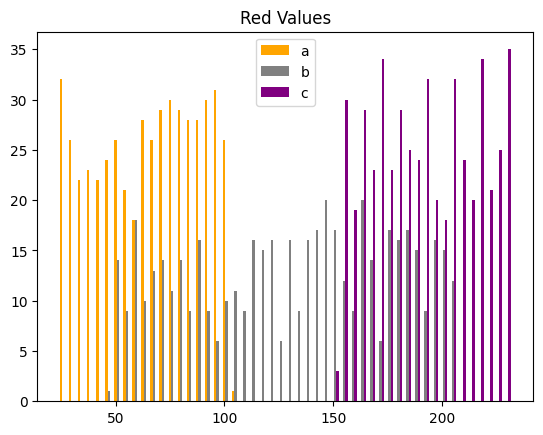

In [12]:
# Visualize and compare red values of each class
plt.hist([a['r'],b['r'],c['r']], bins=50, color=['orange','gray','purple'])
plt.legend(("a","b","c"))
plt.title("Red Values")

Text(0.5, 1.0, 'Red/Green Value Ratio')

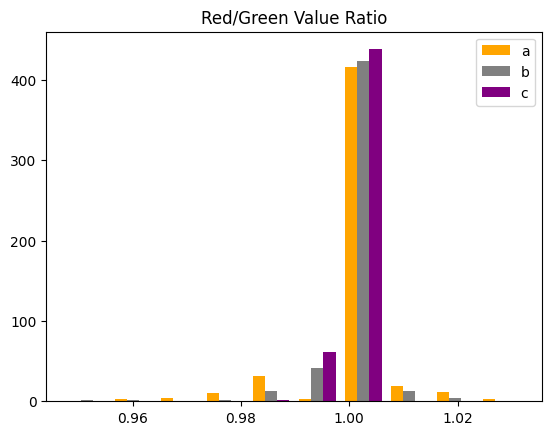

In [13]:
# Check to see how similar red and green values are
plt.hist([a['r']/a['g'], b['r']/b['g'], c['r']/c['g']], bins=10, color=['orange','gray','purple'])
plt.legend(("a","b","c"))
plt.title("Red/Green Value Ratio")

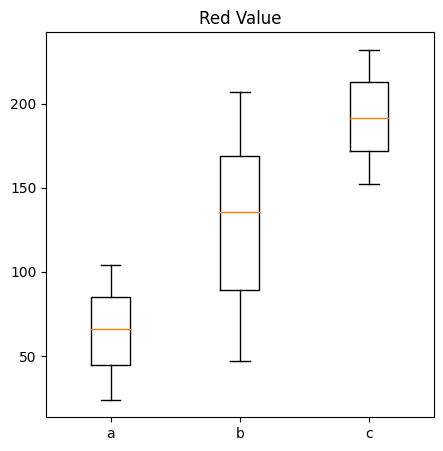

In [14]:
# Check range of red values for each class
fig = plt.figure(figsize =(5, 5))
plt.boxplot([a['r'], b['r'], c['r']], labels=['a','b','c'])
plt.title("Red Value")
plt.show()

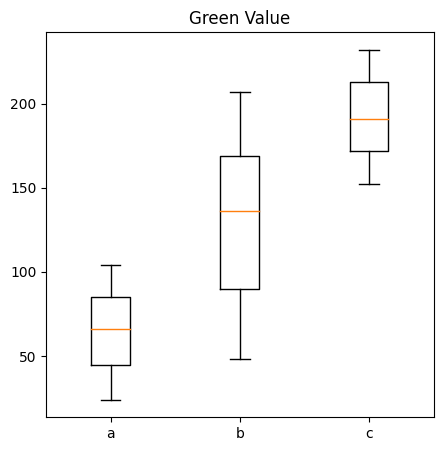

In [15]:
# Check range of green values for each class
fig = plt.figure(figsize =(5, 5))
plt.boxplot([a['g'], b['g'], c['g']], labels=['a','b','c'])
plt.title("Green Value")
plt.show()

Text(0.5, 1.0, 'Blue Value')

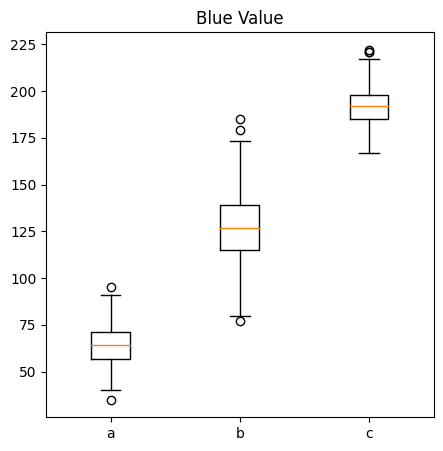

In [16]:
# Check range of blue values for each class
fig = plt.figure(figsize =(5, 5))
plt.boxplot([a['b'], b['b'], c['b']], labels=['a','b','c'])
plt.title("Blue Value")

Text(0.5, 1.0, 'Color Ratio')

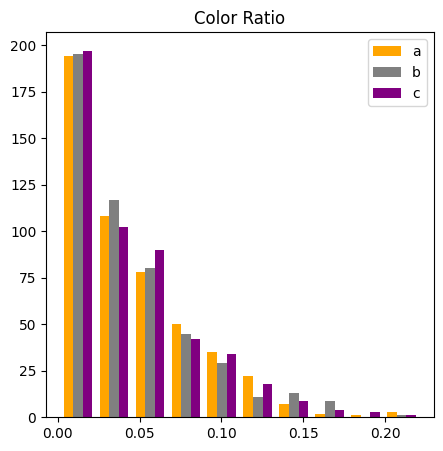

In [17]:
# Check to see if there are any major differences between classes when it comes to the ratio of the colored box to the entire image
fig = plt.figure(figsize =(5, 5))
plt.hist([a['color_ratio'], b['color_ratio'], c['color_ratio']], bins=10, color=['orange','gray','purple'])
plt.legend(("a","b","c"))
plt.title("Color Ratio")

Text(0.5, 1.0, 'Image Width')

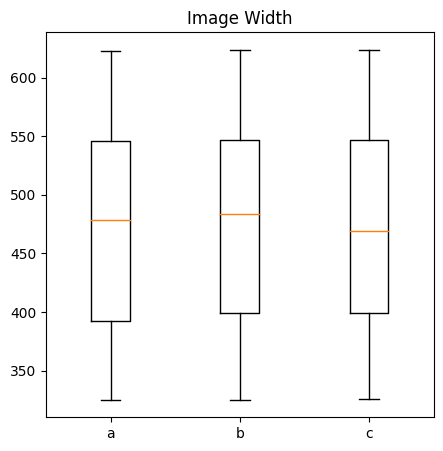

In [18]:
# Check to see if there are any major differences in image width/size between classes
fig = plt.figure(figsize =(5, 5))
plt.boxplot([a['width'], b['width'], c['width']], labels=['a','b','c'])
plt.title("Image Width")

Text(0.5, 1.0, 'Colored Square Width')

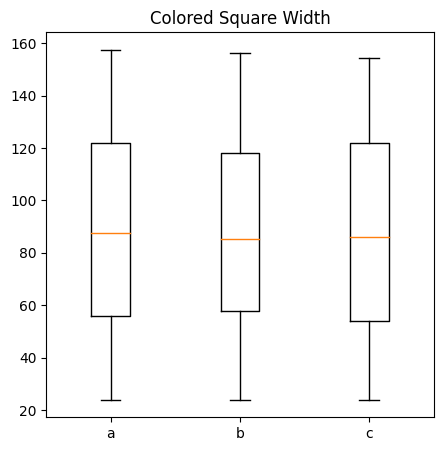

In [19]:
# Check to see if there are any major differences in width/size of the colored square between classes
fig = plt.figure(figsize =(5, 5))
plt.boxplot([a['color_width'], b['color_width'], c['color_width']], labels=['a','b','c'])
plt.title("Colored Square Width")